# Linear Regression

In [340]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy  # package that converts variables into data matrices

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.1f' % x)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [341]:
%matplotlib inline

In [342]:
movie_df = pd.read_csv("box_office_mojo_data.csv")

In [343]:
movie_df2 = pd.read_csv("box_office_mojo_data_2018.csv")

In [344]:
movie_df.head()

,Unnamed: 0,movie_title,domestic_total_gross,runtime_minutes,rating,budget
0,0,Avengers: Endgame,858373000,181.0,PG-13,356000000
1,1,The Lion King,543638043,118.0,PG,260000000
2,2,Toy Story 4,434038008,100.0,G,200000000
3,3,Frozen II,477373578,103.0,PG,150000000
4,4,Captain Marvel,426829839,123.0,PG-13,160000000


In [345]:
movie_df2.drop(["Unnamed: 0"], axis = 1)

,movie_title,domestic_total_gross,runtime_minutes,rating,budget
0,Black Panther,700059566,134.0,PG-13,0
1,Avengers: Infinity War,678815482,149.0,PG-13,0
2,Incredibles 2,608581744,118.0,PG,0
3,Jurassic World: Fallen Kingdom,417719760,128.0,PG-13,170000000
4,Deadpool 2,318491426,119.0,R,110000000
...,...,...,...,...,...
794,The Charmer,26167,100.0,NaN,0
795,Thelma,147391,116.0,NaN,0
796,A Prayer Before Dawn,14453,116.0,R,0
797,The Last Movie Star,14410,94.0,R,0


In [346]:
frames = [ movie_df, movie_df2 ]
result_df = pd.concat(frames,ignore_index=True, sort=False)
result_df.head()

,Unnamed: 0,movie_title,domestic_total_gross,runtime_minutes,rating,budget
0,0,Avengers: Endgame,858373000,181.0,PG-13,356000000
1,1,The Lion King,543638043,118.0,PG,260000000
2,2,Toy Story 4,434038008,100.0,G,200000000
3,3,Frozen II,477373578,103.0,PG,150000000
4,4,Captain Marvel,426829839,123.0,PG-13,160000000


In [347]:
result_df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [348]:
result_df.shape

(1598, 5)

In [349]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 5 columns):
movie_title             1598 non-null object
domestic_total_gross    1598 non-null int64
runtime_minutes         1489 non-null float64
rating                  806 non-null object
budget                  1598 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 62.5+ KB


In [350]:
result_df.isna().sum()

movie_title               0
domestic_total_gross      0
runtime_minutes         109
rating                  792
budget                    0
dtype: int64

In [351]:
avg_runtime = result_df["runtime_minutes"].mean()
avg_runtime

110.6561450638012

In [352]:
result_df[result_df['runtime_minutes'].isnull()]

,movie_title,domestic_total_gross,runtime_minutes,rating,budget
94,On the Basis of Sex,24622687,nan,PG-13,0
101,Hellboy,21903748,nan,R,50000000
115,The Kid Who Would Be King,16790790,nan,PG,0
176,The Oscar Nominated Short Films 2019: Documentary,3531094,nan,NaN,0
190,Tod@s Caen,2670925,nan,PG-13,0
...,...,...,...,...,...
1550,Journey to the South Pacific,7653913,nan,G,0
1562,"One Sings, the Other Doesn't",19919,nan,NaN,0
1566,To the Arctic 3D,14560838,nan,G,0
1573,Allegiance to Broadway,18527,nan,NaN,0


In [353]:
result_df[result_df['runtime_minutes'].isnull()].shape

(109, 5)

In [354]:
result_df['runtime_minutes'].fillna(avg_runtime, inplace = True)


In [355]:
result_df[result_df['runtime_minutes'].isnull()].shape

(0, 5)

In [356]:
result_df['rating'].nunique()

8

In [357]:
result_df['rating'].unique()

array(['PG-13', 'PG', 'G', 'R', nan, 'Not Rated', 'TV-PG', 'NC-17',
       'M/PG'], dtype=object)

In [358]:
result['rating'].value_counts()

R            366
PG-13        237
PG           146
Not Rated     34
G             20
M/PG           1
TV-PG          1
NC-17          1
Name: rating, dtype: int64

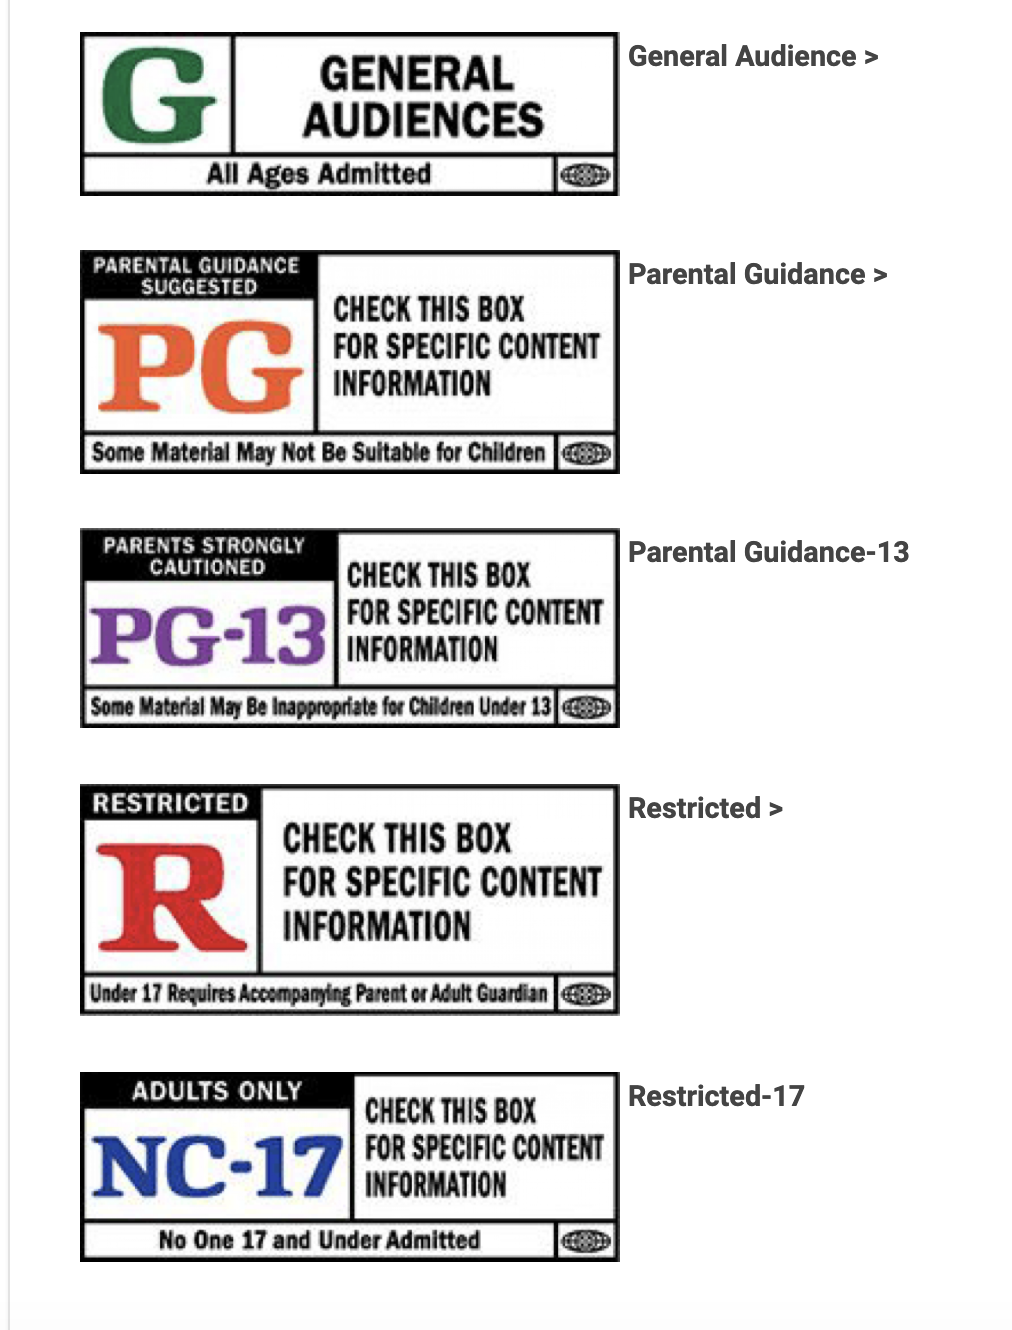 

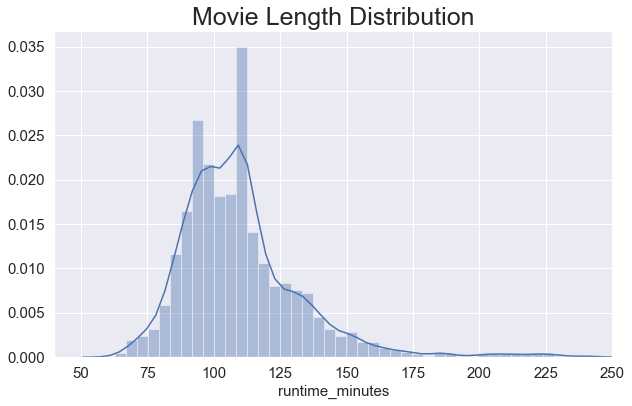

In [362]:
rc={'font.size': 32, 'axes.labelsize': 15, 'legend.fontsize': 15, 
    'axes.titlesize': 32, 'xtick.labelsize': 15, 'ytick.labelsize': 15}
sns.set(rc=rc)
plt.figure(figsize=(10,6))
plt.title("Movie Length Distribution", fontsize=25)

plt.xlim(40, 250)
sns.distplot(result_df.runtime_minutes, bins = 100);

In [419]:
result_df[result_df.runtime_minutes>200].sort_values(by = "runtime_minutes", ascending = False)

,movie_title,domestic_total_gross,runtime_minutes,rating,budget
1561,Eight Hours Don't Make a Day,19987,476.0,Not Rated,0
489,War and Peace,148503,422.0,Not Rated,0
1125,"DCI 2019: Big, Loud & Live 16",603320,325.0,Not Rated,0
497,Wilder vs. Ortiz,139207,270.0,Not Rated,0
1580,"A Bread Factory, Part One/A Bread Factory, Par...",17325,242.0,Not Rated,0
200,Gone with the Wind 2019 Re,2176120,238.0,Not Rated,0
660,An Elephant Sitting Still,32556,230.0,Not Rated,0
326,Lawrence of Arabia 2019 Re,482281,228.0,Not Rated,0
1268,National Theatre Live: King Lear,185305,227.0,Not Rated,0
1034,Great Performances at the Met: Verdi: Aida,1595902,225.0,Not Rated,0


In [418]:
result_df[result_df.runtime_minutes<200].sort_values(by = "runtime_minutes", ascending = True)

,movie_title,domestic_total_gross,runtime_minutes,rating,budget
741,Trinity Seven The Movie 2: Heavens Library & C...,15712,63.0,R,0
1585,Just One Drop,60078,66.0,Not Rated,0
1491,The Road Movie,35757,67.0,Not Rated,0
1557,The Devil and Father Amorth,20449,68.0,Not Rated,0
621,The Queen,47818,68.0,Not Rated,0
...,...,...,...,...,...
1373,Cat on a Hot Tin Roof,89332,185.0,Not Rated,0
1029,Great Performances at the Met: Puccini: La Bohème,1764201,187.0,Not Rated,0
657,The Wild Pear Tree,34014,188.0,Not Rated,0
233,Never Look Away,1304042,189.0,R,0


Makes sense: 'War and Peace' is endless, it's longer than the 'Atlas Shrugged', and the 'Eight Hours Don't Make a Day' would surely have taked at least a day to watch. These movies are almost as long as the quarantine has been.

In [364]:
result_df[result_df['budget'] == 0].shape

(1312, 5)

Out of 1598 movies, 1312 are missing budget info :facepalm:

 **Disclaimer:**

If I had realized that earlier: I would have gathered movie data for at least 30 years, and not just 2 years, so that I could drop those zeroes without remorse. However, for the sake of the timely completion of this exercise and developing an MVP, I going to impute them: I'm going to assume that budget was somewhere less than the revenue. In this particular case I am going to multiply revenue by a random number between 0.1 and 0.75. I realize how unorthodox this approach is and I admit to the possibility of inaccurate model creation. I will accept it as a learning experience and will build up on it in the future.

In [365]:
result_df[result_df.runtime_minutes>200].nunique()

movie_title             23
domestic_total_gross    23
runtime_minutes         18
rating                   0
budget                   3
dtype: int64

In [392]:
result_df[result_df['budget'] == 0].sample(20)

,movie_title,domestic_total_gross,runtime_minutes,rating,budget
396,One Child Nation,270128,88.0,R,0
403,Star Raiders: The Adventures of Saber Raine,260234,83.0,Not Rated,0
1527,Jet Trash 2018 Re,26002,85.0,Not Rated,0
1230,Happy End,301718,107.0,R,0
242,Los Domirriqueños 2,1187280,107.0,Not Rated,0
1368,The Breadwinner,312381,94.0,PG-13,0
1375,Bolshoi Ballet: Swan Lake,88905,160.0,Not Rated,0
945,Welcome to Marwen,10763520,116.0,PG-13,0
1593,The Charmer,26167,100.0,Not Rated,0
607,Maria By Callas 2018 Re,1267301,119.0,PG,0


In [393]:
result_df['rating'].fillna('Not Rated', inplace = True)

In [394]:
result_df['rating'].unique()

array(['PG-13', 'PG', 'G', 'R', 'Not Rated', 'TV-PG', 'NC-17', 'M/PG'],
      dtype=object)

In [395]:
result_df.sample(20)

,movie_title,domestic_total_gross,runtime_minutes,rating,budget
542,The Song of Names,1077584,113.0,PG-13,0
1534,Elliot the Littlest Reindeer 2018 Re,24262,89.0,PG,0
664,Ága,35178,96.0,Not Rated,0
751,Boy Erased,6788692,115.0,R,0
864,Goosebumps 2: Haunted Halloween,46700633,90.0,PG,35000000
582,Working Woman,64048,93.0,Not Rated,0
1014,Murder on the Orient Express,102826543,114.0,PG-13,55000000
994,The Disaster Artist,21120616,104.0,R,0
1575,306 Hollywood,18399,94.0,Not Rated,0
282,David Crosby: Remember My Name,732793,95.0,R,0


In [396]:
import random

In [397]:
# To populate the missing budget values:
result_df['budget'] = result_df['budget'].fillna(result_df['domestic_total_gross'] * random.uniform(0.1, 0.75))

In [398]:
result_df.info() # the code didn't make the zero values apparent because they are not NaNs.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 5 columns):
movie_title             1598 non-null object
domestic_total_gross    1598 non-null int64
runtime_minutes         1598 non-null float64
rating                  1598 non-null object
budget                  1598 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 62.5+ KB


In [399]:
result_df.sample(20)

,movie_title,domestic_total_gross,runtime_minutes,rating,budget
1549,Primal Rage: The Legend of Konga,21497,106.0,R,0
828,Mary Poppins Returns,171958438,130.0,PG,130000000
576,Fast Colour,76916,100.0,PG-13,0
1225,The Fireflies Are Gone,245006,96.0,Not Rated,0
97,Parasite,53369749,132.0,R,11400000
711,General Magic,20046,93.0,Not Rated,0
457,Robin Hood,30824628,116.0,PG-13,100000000
241,Kingdom Men Rising,1188936,93.0,Not Rated,0
490,Dogman,148225,103.0,Not Rated,0
147,Free Solo,17541090,100.0,PG-13,0


Since we only have 8 types of ratings listed, I can use dummy variable in order to make them participate in the correlation matrix.

In [400]:
rating_df = result_df[["movie_title", "rating"]]

In [401]:
rating_df.head()

,movie_title,rating
0,Avengers: Endgame,PG-13
1,The Lion King,PG
2,Toy Story 4,G
3,Frozen II,PG
4,Captain Marvel,PG-13


In [402]:
rating_df_dummies = rating_df.rating.str.get_dummies()

In [403]:
rating_df_dummies.head()

,G,M/PG,NC-17,Not Rated,PG,PG-13,R,TV-PG
0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0


In [404]:
df = rating_df.merge(rating_df_dummies, left_index = True, right_index = True)

In [405]:
df.head()

,movie_title,rating,G,M/PG,NC-17,Not Rated,PG,PG-13,R,TV-PG
0,Avengers: Endgame,PG-13,0,0,0,0,0,1,0,0
1,The Lion King,PG,0,0,0,0,1,0,0,0
2,Toy Story 4,G,1,0,0,0,0,0,0,0
3,Frozen II,PG,0,0,0,0,1,0,0,0
4,Captain Marvel,PG-13,0,0,0,0,0,1,0,0


In [406]:
large_df = df.merge(result_df)

In [407]:
large_df.head()

,movie_title,rating,G,M/PG,NC-17,Not Rated,PG,PG-13,R,TV-PG,domestic_total_gross,runtime_minutes,budget
0,Avengers: Endgame,PG-13,0,0,0,0,0,1,0,0,858373000,181.0,356000000
1,The Lion King,PG,0,0,0,0,1,0,0,0,543638043,118.0,260000000
2,Toy Story 4,G,1,0,0,0,0,0,0,0,434038008,100.0,200000000
3,Frozen II,PG,0,0,0,0,1,0,0,0,477373578,103.0,150000000
4,Captain Marvel,PG-13,0,0,0,0,0,1,0,0,426829839,123.0,160000000


In [408]:
large_df.corr()

,G,M/PG,NC-17,Not Rated,PG,PG-13,R,TV-PG,domestic_total_gross,runtime_minutes,budget
G,1.0,-0.0,-0.0,-0.1,-0.0,-0.1,-0.1,-0.0,0.0,-0.0,-0.0
M/PG,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
NC-17,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
Not Rated,-0.1,-0.0,-0.0,1.0,-0.3,-0.4,-0.6,-0.0,-0.3,0.1,-0.3
PG,-0.0,-0.0,-0.0,-0.3,1.0,-0.1,-0.2,-0.0,0.2,-0.1,0.2
PG-13,-0.1,-0.0,-0.0,-0.4,-0.1,1.0,-0.2,-0.0,0.3,0.0,0.3
R,-0.1,-0.0,-0.0,-0.6,-0.2,-0.2,1.0,-0.0,-0.0,-0.0,-0.0
TV-PG,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0
domestic_total_gross,0.0,-0.0,-0.0,-0.3,0.2,0.3,-0.0,-0.0,1.0,0.1,0.7
runtime_minutes,-0.0,0.0,-0.0,0.1,-0.1,0.0,-0.0,-0.0,0.1,1.0,0.1


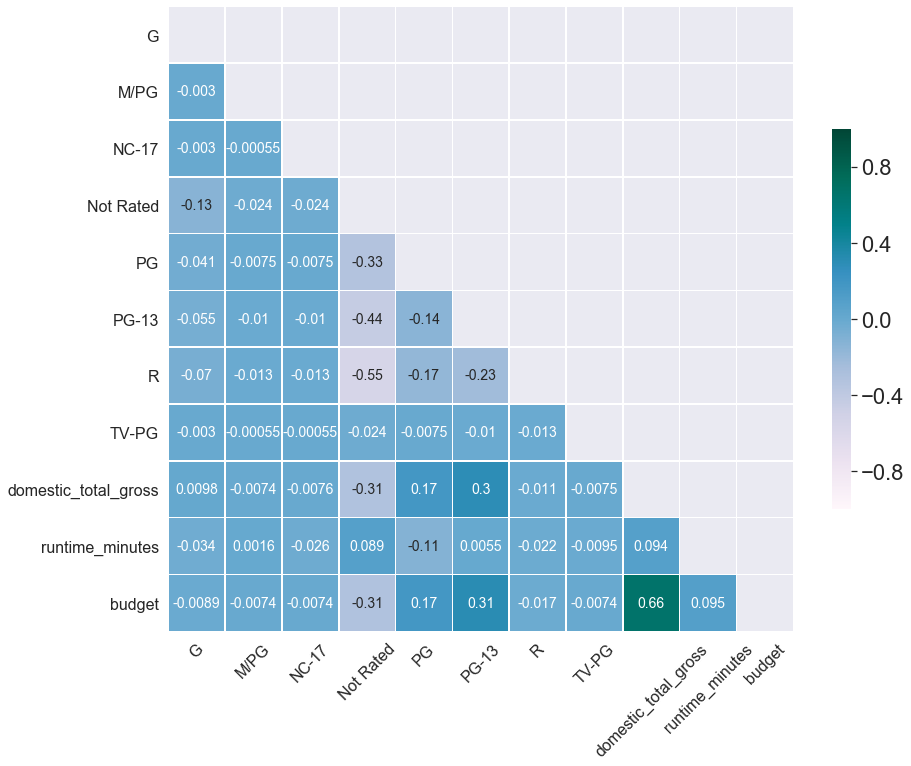

In [409]:
# Two lines of code below will help us remove the duplicate values from the heatmap, 
# so that is a triangle as opposed to square: less crowded feel.
mask = np.zeros(large_df.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

# In this heatmap, we include ratings and see if there's any correlations.
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(14,14))

sns.heatmap(large_df.corr(), cmap="PuBuGn", cbar = True, \
            annot=True, annot_kws={"size":14}, \
            vmin=-1, vmax=1, center = 0, mask = mask, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# For better visual alignment:
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Tick label alignment.
plt.yticks(rotation = 0, fontsize = 16)
plt.xticks(rotation = 45, fontsize = 16)

plt.show() 

## Modeling:

First, I will try statsmodels using patsy to create feature matrix.

In [410]:
X = result_df['budget']
y = result_df['domestic_total_gross']

In [411]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 5 columns):
movie_title             1598 non-null object
domestic_total_gross    1598 non-null int64
runtime_minutes         1598 non-null float64
rating                  1598 non-null object
budget                  1598 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 62.5+ KB


In [412]:
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     domestic_total_gross   R-squared (uncentered):                   0.486
Model:                              OLS   Adj. R-squared (uncentered):              0.485
Method:                   Least Squares   F-statistic:                              1508.
Date:                  Thu, 16 Jul 2020   Prob (F-statistic):                   7.78e-233
Time:                          23:03:46   Log-Likelihood:                         -30531.
No. Observations:                  1598   AIC:                                  6.106e+04
Df Residuals:                      1597   BIC:                                  6.107e+04
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
budget         1.3425      0.035     38.832      0.000       1.275       1.410
==============================================================================
Omnibus:                     1978.411   Durbin-Watson:                   1.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           413671.999
Skew:                           6.317   Prob(JB):                         0.00
Kurtosis:                      80.803   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [413]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('domestic_total_gross ~ budget + runtime_minutes + rating', data=large_df, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     domestic_total_gross   R-squared:                       0.453
Model:                              OLS   Adj. R-squared:                  0.451
Method:                   Least Squares   F-statistic:                     168.0
Date:                  Thu, 16 Jul 2020   Prob (F-statistic):          9.65e-232
Time:                          23:03:49   Log-Likelihood:                -35018.
No. Observations:                  1834   AIC:                         7.006e+04
Df Residuals:                      1824   BIC:                         7.011e+04
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.834e+06    9.7e+06      0.395      0.693   -1.52e+07    2.29e+07
rating[T.M/PG]      -1.697e+07   4.83e+07     -0.351      0.726   -1.12e+08    7.78e+07
rating[T.NC-17]     -1.364e+07   4.84e+07     -0.282      0.778   -1.08e+08    8.12e+07
rating[T.Not Rated] -1.655e+07   8.84e+06     -1.873      0.061   -3.39e+07    7.83e+05
rating[T.PG]          7.14e+06   9.45e+06      0.756      0.450   -1.14e+07    2.57e+07
rating[T.PG-13]      8.556e+06   9.18e+06      0.932      0.352   -9.45e+06    2.66e+07
rating[T.R]         -8.391e+06      9e+06     -0.933      0.351    -2.6e+07    9.25e+06
rating[T.TV-PG]     -1.551e+07   4.83e+07     -0.321      0.748    -1.1e+08    7.93e+07
budget                  1.1253      0.036     31.123      0.000       1.054       1.196
runtime_minutes      1.198e+05   4.15e+04      2.889      0.004    3.84e+04    2.01e+05
==============================================================================
Omnibus:                     2138.445   Durbin-Watson:                   0.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           325445.845
Skew:                           5.809   Prob(JB):                         0.00
Kurtosis:                      67.217   Cond. No.                     1.60e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Plotting the residuals: differences between predicted values vs. actual values.

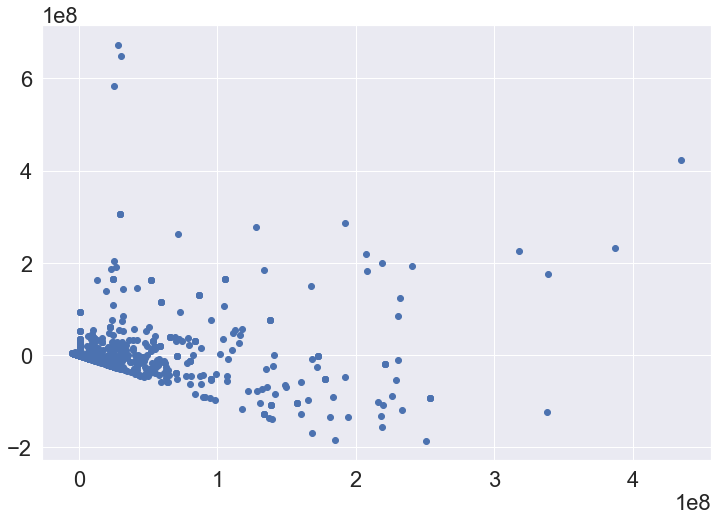

In [414]:
plt.figure(figsize=(12,8))
plt.scatter(fit.predict(), fit.resid);

In [390]:
# How do I interpret this graph? Why are the numbers in scientific notation? 
# Why does there appear to be a sharp cut-out?

In [416]:
# Create an empty model
lr = LinearRegression()

# Columns in result_df: index, movie_title, domestic_total_gross, runtime_minutes, rating, budget
# Choose the predictor variables: 
X = large_df.iloc[:, [2, 3, 4]]     
# Choose the response variable(s)
y = large_df.iloc[:, 5]

# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X, y)

0.018428906153656333

In [336]:
print(X)

      G  M/PG  NC-17
0     0     0      0
1     0     0      0
2     1     0      0
3     0     0      0
4     0     0      0
...  ..   ...    ...
1829  0     0      0
1830  0     0      0
1831  0     0      0
1832  0     0      0
1833  0     0      0

[1834 rows x 3 columns]
